<img src="../files/misc/logo.png" width=300/>
<h1 style="color:#872325"> Webscrapping </h1>

De acuerdo a [Wikipedia](https://es.wikipedia.org/wiki/Web_scraping), *Web Scrapping*, 

> es una técnica utilizada mediante programas de software para extraer información de sitios web. Usualmente, estos programas simulan la navegación de un humano en la World Wide Web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.

Para fines prácticos, realizamos un web scrapping cuándo no contamos con alguna manera de acceder a información estructurada de datos por analizar (.csv, .json, base de datos, API). 

---

## HTML
Al hacer webscrapping, dependemos de la estructura de la página web para poder acceder a la información que deseamos obtener. La estructura de la página web se define mediante un lenguaje llamado `HTML` (Hypertext Markup Language) el cual se compone por medio de *tags*.

```HTML
<tag>
</tag>
```

Un *tag* define una sección de la página. Cada *tag* tiene una propiedad. Un conjunto de estos tags definen el cuerpo de la página.


### Una primera página web
```HTML
<!DOCTYPE html>
<html>
<body>

<h1>Data Science and Machine Learning</h1>

</body>
</html>
```

Para nuestros fines, un *tag* representará una sección dentro de la página la cuál nos gustaría explorar o extraer.

---

## CSS

Un *Cascading Style Sheet* (CSS), es un archivo que viene acompañado de un html y define el estilo de la página.

```CSS
selector {
    property: property-value;
}
```

Cada *selector* contiene diferentes [propiedades](http://web.simmons.edu/~grabiner/comm244/weekthree/css-basic-properties.html) de acuerdo al *tag*, clase o *id* que le corresponda.

Para fines de webscrapping, un los *tags*, *ids* y *clases* ofrencen estrucura dentro de una página.

* Tags: estructura general
* Clase: secciones genéricas dentro de una página
* *id*: Secciones especifícas

---

## Javascript y el DOM

La mayoría de las páginas que visitamos hoy en día son interactivas. La interactividad de un una página web es proporcionada por un lenguaje de programación llamado `javascript`.

La manera en la que Javascript asigna u obtiene elementos de una página se conoce como el *Document Object Notation* (DOM).

Para fines de webscrapping, esto es importante puesto que en ocasiones, una página es vacía hasta que un programa de Javascript se ejecuta para arrojar información.

## Un primer webscrap

En este módulo estaremos ocupando la librería [requests_html](https://github.com/psf/requests-html) para hacer webscrapping.

In [3]:
!pip install requests-html

     |████████████████████████████████| 1.2MB 233kB/s eta 0:00:01
     |████████████████████████████████| 71kB 3.2MB/s eta 0:00:011
  Created wheel for pyppeteer: filename=pyppeteer-0.0.25-cp37-none-any.whl size=78362 sha256=02bc7ed4a5517847fd42d5b4bcc1bdc056b22790ae892fc8c8f31c8198754b30
  Stored in directory: /Users/carlossales/Library/Caches/pip/wheels/34/e0/5d/070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=2fe6c977a997aba6590d82be6cea7d610dbf63476f1aa9f88cc704b2a93034c7
  Stored in directory: /Users/carlossales/Library/Caches/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for parse: filename=parse-1.14.0-cp37-none-any.whl size=23463 sha256=b8daaa301e5a6cda8be2a4df6628a422990b74ba56dea3cbf79dd32d72e7d794
  Stored in directory: /Users/carlossales/Library/Caches/pip/wheels/d7/07/e0/b74bfdc1d434e73ef79e69e301e82a7825e0c070f7442beb61
  Create

In [4]:
from requests_html import HTML    

In [5]:
with open("../files/lec04/ex03.html") as f:
    webp = f.read()

html = HTML(html=webp)
print(html.html)

<!DOCTYPE html>
<html>
<head>
    <link href="style2.css" rel="stylesheet"/>
</head>

<body>

    <h1>Data Science and Machine Learning</h1>

    <div class="my_class">
        <p> By <a href="https://bit.ly/34EdyH2">Analysic Nabla</a></p>
        <p> At the <a href="https://bit.ly/2qDvao4">ITAM</a></p>
    </div>

</body>
</html>



In [6]:
# Extrayendo todos los links de la página
html.links

{'https://bit.ly/2qDvao4', 'https://bit.ly/34EdyH2'}

In [13]:
# Extrayendo el primer encabezado de la página
html.find("H1", first=True).text

'Data Science and Machine Learning'

In [8]:
# Buscando todos los elementos <p> (paragrapshs)
html.find("p")

[<Element 'p' >, <Element 'p' >]

In [14]:
[i.text for i in html.find("p")]

['Por Analysic Nabla', 'En el ITAM', '']

In [9]:
# Extrayendo una sección dentro de un div
html.find("div", first=True)

<Element 'div' class=('my_class',)>

### Un segundo ejemplo

In [10]:
with open("../files/lec04/ex04.html") as f:
    webp = f.read()

html = HTML(html=webp)
print(html.html)

<!DOCTYPE html>
<html>
<head>
    <link href="style2.css" rel="stylesheet"/>
    <script>
        function sendGreeting() {
            document.getElementById("greeting").innerHTML = "Aprendamos a hacer webscrapping!"
        }
        

    </script>
</head>

<body onload="sendGreeting()">
    <h1>Data Science and Machine Learning</h1>

    <div class="my_class">
        <p>Por Analysic Nabla</p>
        <p>En el ITAM</p>
        <p id="greeting"></p>
    </div>

</body>
</html>



In [11]:
# ¿Qué notamos en este ejemplo que no concuerde
# con lo que esperaríamos ver en la página?
for item in html.find("p"):
    print(item.text)

Por Analysic Nabla
En el ITAM



In [9]:
html.find("p[id='greeting']", first=True)

<Element 'p' id='greeting'>

<h1 style="color:#872325">HTTP Requests</h1>

Las páginas que visitamos día a día viven en un servidor y no en nuestra computadora. Al abrir nuestro navegador y entrar a una página, el navegador solicita la información de la página al servidor por medio de un proceso de intercambio de información conocido como HTTP.

> *Hypertext Transfer Protocol* (HTTP) es un proceso mediante el cual se hace un intercambio de información entre un cliente (un navegador) y un servidor por medio de mensajes.

![server](https://mdn.mozillademos.org/files/13677/Fetching_a_page.png)
**Fuente**x: https://developer.mozilla.org

Dependiendo del tipo de mensaje que le mandemos a un servidor, este procesará la información enviada desde el cliente (nosotros) de diferentes maneras. Para fines de webscrapping, los métodos más comúnes de comunicarte con un servidor son:

* `GET`: Solicitia un archivo determinado al servidor. Un *GET Request* se debe usar exclusivamente para adquirir información.
    * Obtener información de una página web
    * Cargar una imágen

* `POST`: Envía datos al servidor para ser procesados
    * Dejar tu número celular en una página
    * Loggearte
    * Dejar un comentario en un blog post

En Python, podemos hacer conexiones a una página por medio de la librería `requests`

In [1]:
import requests

In [2]:
r = requests.get("https://nabla.mx")
r

<Response [200]>

In [3]:
r.text

'<!DOCTYPE html>\n<html>\n    <head>\n    <meta charset="utf-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <title>Analysic Nabla</title>\n    <meta name="viewport" content="width=device-width" />\n    <meta name="description" content="Data Science | Machine Learning" />\n    <link rel="canonical" href="https://example.github.io/" />\n\n    <!-- Custom CSS & Bootstrap Core CSS - Uses Bootswatch Flatly Theme: http://bootswatch.com/flatly/ -->\n    <link rel="stylesheet" href="https://d1qmdf3vop2l07.cloudfront.net/plum-ukulele.cloudvent.net/compressed/_min_/3f9d98ba04fd66a8fd8ccdb518a11448.css" data-cms-original-href="/style.css" />\n\n    <!-- Custom Fonts -->\n    <link rel="stylesheet" href="https://d1qmdf3vop2l07.cloudfront.net/plum-ukulele.cloudvent.net/compressed/_min_/0dc05773bf1f505f39f219fdfefdd8ed.css" data-cms-original-href="/css/font-awesome/css/font-awesome.min.css" />\n    <link href="https://fonts.googleapis.com/css?family=Roboto&display=swap" rel=

Posteriormente tendríamos que pasarlo a una instancia de la clase `HTML` para poder analizar la página. Para evitar esto, podemos hacer uso de la clase `HTMLSession` que nos permite hacer llamadas al servidor y acceso al html que nos regrese.

In [10]:
from requests_html import HTMLSession

In [5]:
with HTMLSession() as sess:
    r = sess.get("https://nabla.mx")
r

<Response [200]>

In [6]:
r.html.links

{'http://blog.nabla.mx',
 'http://proyectos.nabla.mx',
 'https://github.com/analysic-nabla',
 'https://twitter.com/analysicnabla',
 'https://www.facebook.com/pages/category/Consulting-Agency/Analysic-Nabla-326424374613601/'}

<h1 style="color:#872325">Webscrapping</h1>

<h2 style="color:teal">Ejemplo: Arxiv ML Papers (I)</h2>

Consigue el nombre y el link de los último 25 papers en Machine Learning publicados en Arxiv y guárdalos dentro de un archivo `csv`.

In [15]:
from requests_html import HTMLSession
import pandas as pd

In [16]:
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [17]:
divpage = r.html.find("div[id='dlpage']", first=True)

In [18]:
divpage.find("h1", first=True).text

'Machine Learning'

In [19]:
papers_links = divpage.find("dt")
len(papers_links)

25

In [20]:
papers_titles = divpage.find("dd")
len(papers_titles)

25

In [ ]:
values = []
for link_secc, title_secc in zip(papers_links, papers_titles):
    title = title_secc.find("div[class='list-title mathjax']", first=True).text
 
    abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
    abstract_url, *_ = abstract_url
    
    values.append([title, abstract_url])

In [22]:
df_values = pd.DataFrame(values, columns=["title", "url"])
df_values.head()

,title,url
0,Title: Fair Data Adaptation with Quantile Pres...,https://arxiv.org/abs/1911.06685
1,Title: Imputing missing values with unsupervis...,https://arxiv.org/abs/1911.06646
2,Title: Likelihood Assignment for Out-of-Distri...,https://arxiv.org/abs/1911.06515
3,Title: Solving Inverse Problems by Joint Poste...,https://arxiv.org/abs/1911.06379
4,Title: TinyCNN: A Tiny Modular CNN Accelerator...,https://arxiv.org/abs/1911.06777


In [23]:
# Depuramos la información que no necesitamos
df_values = df_values.assign(title=df_values.title.str.lstrip("Title: "))
df_values.head()

,title,url
0,Fair Data Adaptation with Quantile Preservation,https://arxiv.org/abs/1911.06685
1,Imputing missing values with unsupervised rand...,https://arxiv.org/abs/1911.06646
2,Likelihood Assignment for Out-of-Distribution ...,https://arxiv.org/abs/1911.06515
3,Solving Inverse Problems by Joint Posterior Ma...,https://arxiv.org/abs/1911.06379
4,nyCNN: A Tiny Modular CNN Accelerator for Embe...,https://arxiv.org/abs/1911.06777


In [24]:
# df_values.to_csv("ML-arxiv.csv", index=False)

## Queries al sistema

En ocasiones un *GET method* puede venir acompañado con parámetros obligatorios u opcionales para el sistema.

* Se denota una sección de parámetros de consulta por medio de `?`.
* cada par parametro-valor se denota `param=val`
* se separa cada query por medio de `&`

```
http://some-page.com?key1=val1&key2=val2&..&keyn=valn
```

In [25]:
url = "https://arxiv.org/list/stat.ML/recent?show=250"
with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [26]:
papers_titles = r.html.find("div[id='dlpage']", first=True).find("dd")
len(papers_titles)

250

### Una manera más limpia de mandar queries

In [27]:
url = "https://arxiv.org/list/stat.ML/recent"
data = {
    "show": 250
}
with HTMLSession() as sess:
    r = sess.get(url, params=data)
r

<Response [200]>

In [28]:
papers_titles = r.html.find("div[id='dlpage']", first=True).find("dd")
len(papers_titles)

250

<h1 style="color:#872325">APIs</h1>

En ocasiones no es necesario acceder a un HTML a fin de obtener la información deseada de una página web. 

Un API (*Application programming interface*),
> es un protocolo de comunicación entre un cliente y un servidor diseñado para simplificar la creación aplicaciónes por parte del cliente. [...] Un API está diseñado de tal manera que si el cliente hace una petición al sistema en un formato específico, siempre tendrá el mismo formato de respuesta por parte del servidor, o iniciará una acción definida.

En esta sección ocuparemos el API de [Alpha Vantage](https://www.alphavantage.co), un proveedor de información histórica y tiempo real de datos de acciones, FX y criptomonedas.

<h2 style="color:teal">Ejemplo: Alpha Vantage</h2>

A fin de hacer mejor uso de un API es importante siempre revisar la documentación del API.

In [29]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
%config InlineBackend.figure_format = "retina"

In [31]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"
# Cargamos el API Key de Alpha Vantage (es personal)
avkey = os.environ["ALPHA_VANTAGE_KEY"]

In [32]:
curr_list_url = "https://www.alphavantage.co/physical_currency_list/"
curr_list = pd.read_csv(curr_list_url).set_index("currency name")
curr_list.head()

,currency code
currency name,
United Arab Emirates Dirham,AED
Afghan Afghani,AFN
Albanian Lek,ALL
Armenian Dram,AMD
Netherlands Antillean Guilder,ANG


In [33]:
from_curr = "United States Dollar"
curr_list.filter([from_curr], axis=0)

,currency code
currency name,
United States Dollar,USD


In [34]:
currencies = ["Mexican Peso", "Euro", "Brazilian Real", "Argentine Peso"]
target_curr = curr_list.filter(currencies, axis=0)
target_curr

,currency code
currency name,
Mexican Peso,MXN
Euro,EUR
Brazilian Real,BRL
Argentine Peso,ARS


## Mensajes de Error

Entramos a la páginas de AlphaVantage y revisamos la documentación para descargar información

In [35]:
intraday1 = {
    "function": "FX_INTRADAY",
    "to_currency": target_curr["currency code"].values[0],
    "from_currency": "USD",
    "apikey": avkey
}

r = requests.get(base_url, params=intraday1)
r

<Response [200]>

In [36]:
r.json()

{'Error Message': 'Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for FX_INTRADAY.'}

In [37]:
intraday2 = {
    "function": "FX_INTRADAY",
    "to_symbol": target_curr["currency code"].values[0],
    "from_symbol": "USD",
    "apikey": avkey,
    "interval": "1min"
}

r = requests.get(base_url, params=intraday2)
r

<Response [200]>

## Manipulando Información de Respuesta

Una vez obtenida la información del API, el siguiente paso es manipular la información para poder analizarla. De ser una seríe de tiempo, lo más natural sería manipularla usando un pandas DataFrame.

In [38]:
data = r.json()
data.keys()

dict_keys(['Meta Data', 'Time Series FX (1min)'])

In [39]:
data["Meta Data"]

{'1. Information': 'FX Intraday (1min) Time Series',
 '2. From Symbol': 'USD',
 '3. To Symbol': 'MXN',
 '4. Last Refreshed': '2019-11-18 21:10:00',
 '5. Interval': '1min',
 '6. Output Size': 'Compact',
 '7. Time Zone': 'UTC'}

In [40]:
df_data = pd.DataFrame(data["Time Series FX (1min)"]).T
df_data.head()

,1. open,2. high,3. low,4. close
2019-11-18 21:10:00,19.2968,19.2974,19.2930,19.2973
2019-11-18 21:09:00,19.2946,19.2970,19.2904,19.2944
2019-11-18 21:08:00,19.2900,19.3006,19.2700,19.2935
2019-11-18 21:07:00,19.2934,19.3052,19.2700,19.2919
2019-11-18 21:06:00,19.2965,19.3001,19.2700,19.2965


In [41]:
df_data.dtypes

1. open     object
2. high     object
3. low      object
4. close    object
dtype: object

## FX Daily

In [42]:
intraday1 = {
    "function": "FX_DAILY",
    "to_symbol": target_curr["currency code"].values[0],
    "from_symbol": "USD",
    "apikey": avkey,
    "outputsize": "full",
}

r = requests.get(base_url, params=intraday1)
r

<Response [200]>

In [43]:
data = r.json()

In [44]:
df_data = pd.DataFrame(data["Time Series FX (Daily)"], dtype=float).T.sort_index()

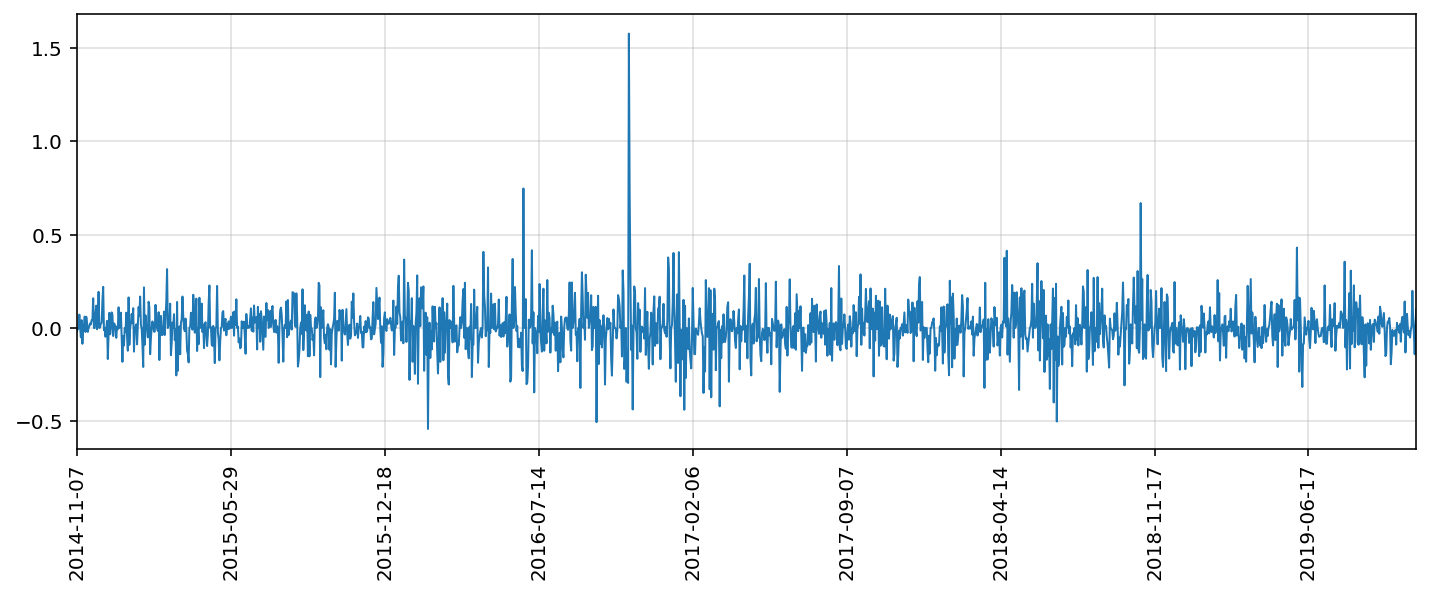

In [45]:
(df_data.apply(lambda x: x["4. close"] - x["1. open"], axis=1)
        .plot(figsize=(12, 4), linewidth=1))
plt.xticks(rotation=90)
plt.grid(alpha=0.4)

<h1 style="color:#872325">API Wrappers (Liberías)</h1>

Como hemos visto, utilizar un API require la codificación de los parámetros que espera recibir el servidor, hacer la llamada al servidor para validar la respuesta y manipular la información recibida a fin de hacer uso de esta.

De querer obtener el mismo formato de respuesta sería necesario crear una librería en Python que contemple cada uno de estos pasos, lo cuál se podría volver una tarea tediosa.

Un **API Wrapper** es una librería escrita en un lenguaje de programación que nos da acceso a un API usando un lenguaje de programación específico

**Nota**: Una de las desventajas de usar un API Wrapper son los posibles *bugs* que el wrapper podría tener.

https://github.com/RomelTorres/alpha_vantage

```
pip install alpha_vantage
```

In [46]:
from alpha_vantage.foreignexchange import ForeignExchange

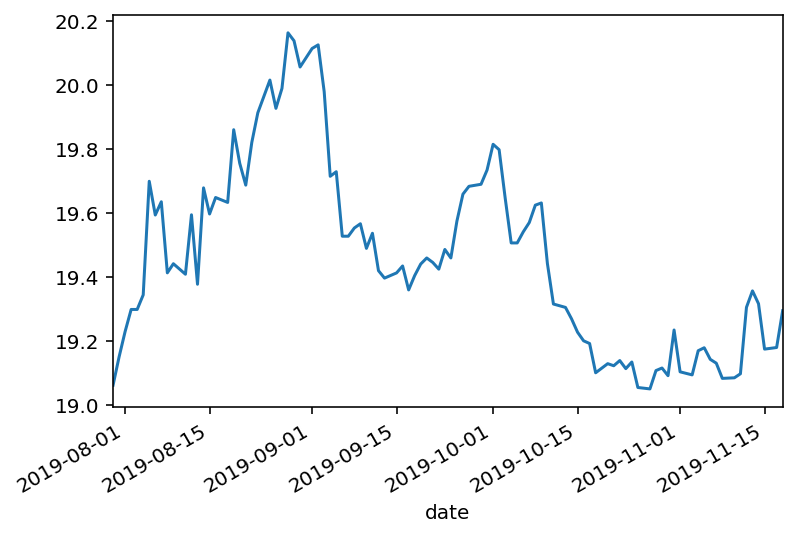

In [47]:
fx = ForeignExchange(key=avkey, output_format="pandas")
data, metadata = fx.get_currency_exchange_daily("USD", "MXN")
data["4. close"].plot()

<h2 style="color:crimson">Ejercicios</h2>

1. Repite el ejemplo *Arxiv ML Papers (I)*, agrega dos nuevas columnas al DataFrame final: `Abstract`, con el resumen de cada paper; `Submitted`, con la fecha en la que fue agregado al sistema. **Hint**: Ambos elementos se encuentran dentro de la *url* encontrada.

----

2. Por medio de la librería `requests` y el API de AlphaVantage, consigue los precios históricos de las monedas `["MXN", "EUR", "BRL", "ARS", "CHF"]` respecto al dólar (todos los precios deben estar en dólares). Crea un DataFrame con cada colúmna la moneda de referencia:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MXN</th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2014-11-24</th>      <td>0.0732</td>      <td>1.2438</td>      <td>0.3920</td>      <td>0.1169</td>      <td>1.0342</td>    </tr>    <tr>      <th>2014-11-25</th>      <td>0.0731</td>      <td>1.2473</td>      <td>0.3955</td>      <td>0.1169</td>      <td>1.0370</td>    </tr>    <tr>      <th>2014-11-26</th>      <td>0.0728</td>      <td>1.2507</td>      <td>0.3995</td>      <td>0.1168</td>      <td>1.0401</td>    </tr>    <tr>      <th>2014-11-27</th>      <td>0.0726</td>      <td>1.2458</td>      <td>0.3947</td>      <td>0.1169</td>      <td>1.0363</td>    </tr>    <tr>      <th>2014-11-28</th>      <td>0.0717</td>      <td>1.2451</td>      <td>0.3891</td>      <td>0.1168</td>      <td>1.0351</td>    </tr>  </tbody></table>


----
3. Con el DataFrame creado en el ejercicio 2, crea el siguiente mapa de calor con la correlación entre cada una de las monedas. **hint**: Revisa que métodos tiene un DataFrame para crear correlaciones; considera la librería `seaborn`.

![](../files/lec04/imgs/heatmap.png)

---

4. Con el DataFrame creado en el ejercicio 2, crea un nuevo DataFrame que incluya una correlación móvil con ventana de 30 días de cada una de las monedas respecto a `"MXN"`. **hint**: Investiga sobre el método `.xs` de un DataFrame

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2015-03-19</th>      <td>0.900941</td>      <td>0.870440</td>      <td>0.835029</td>      <td>0.916637</td>    </tr>    <tr>      <th>2015-03-20</th>      <td>0.874866</td>      <td>0.815453</td>      <td>0.762308</td>      <td>0.903594</td>    </tr>    <tr>      <th>2015-03-22</th>      <td>0.866783</td>      <td>0.789977</td>      <td>0.726098</td>      <td>0.900547</td>    </tr>    <tr>      <th>2015-03-23</th>      <td>0.835823</td>      <td>0.728781</td>      <td>0.643129</td>      <td>0.885424</td>    </tr>    <tr>      <th>2015-03-24</th>      <td>0.801267</td>      <td>0.671188</td>      <td>0.560149</td>      <td>0.877682</td>    </tr>  </tbody></table>

---

5. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura con _scatterplots_ entre todas las combinaciones de las correlaciones respecto a `"MXN"`. ¿Encuentras algún patrón en alguna combinación?

![](../files/lec04/imgs/scatter.png)

---

6. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura, la cuál representa, a cada observación, la correlación promedio entre todas las monedas respecto a `"MXN"` y unas bandas que representan la correlación máxima y mínima a cada observación.

![](../files/lec04/imgs/corr_ts.png)

## References


* https://developer.mozilla.org/en-US/docs/Web
* https://www.w3schools.com/tags/ref_httpmethods.asp

# EJERCICIO 1

In [1]:
from requests_html import HTMLSession
import pandas as pd

In [2]:
# conexión a la página principal
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [3]:
import locale
locale.setlocale(locale.LC_TIME,"es_ES.UTF-8")
from datetime import datetime

def read_abstract(url_abstract):
    with HTMLSession() as sess:
        r = sess.get(url_abstract)
        
        # abstract    
        abst = r.html.find("blockquote[class = 'abstract mathjax']", first=True)
        abst = abst.text.lstrip("Abstract: ")
        
        # submitted
        date_str = r.html.find("div[class = 'dateline']",first=True).text
        date_str = date_str.lstrip("(Submitted on ") #limpiamos la fecha para convertitla en datetime
        date_str = date_str.rstrip(")")
        date = datetime.strptime(date_str, "%d %b %Y")
        
    return abst, date

In [4]:

info = []

dl = r.html.find("dl",first=True)

dt = dl.find("dt")
dd = dl.find("dd")

for dti, ddi in zip (dt,dd): 
    title = ddi.find("div[class = 'list-title mathjax']", first=True).text
    link = dti.find("a[title = 'Download PDF']",first=True)
    link, *_ = link.absolute_links
    authors = ddi.find("div[class = 'list-authors']", first=True)
    authors = authors.text.lstrip("Authors: ")
    abst_and_submi_link = dti.find("a[title = 'Abstract']", first=True)
    abst_and_submi_link, *_ = abst_and_submi_link.absolute_links
    abstract = read_abstract(abst_and_submi_link)[0]
    submitted = read_abstract(abst_and_submi_link)[1]
    
    record = {
        "title": title,
        "link": link,
        "author": authors,
        "abstract": abstract,
        "submitted": submitted
    }
    
    info.append(record)

In [5]:
df = pd.DataFrame(info)
df.head(20)

,title,link,author,abstract,submitted
0,Title: Self-Tuning Deep Reinforcement Learning,https://arxiv.org/pdf/2002.12928,"Tom Zahavy, Zhongwen Xu, Vivek Veeriah, Matteo...",Reinforcement learning (RL) algorithms often r...,2020-02-28
1,Title: The estimation error of general first o...,https://arxiv.org/pdf/2002.12903,"Michael Celentano, Andrea Montanari, Yuchen Wu",Modern large-scale statistical models require ...,2020-02-28
2,Title: Generalizing Convolutional Neural Netwo...,https://arxiv.org/pdf/2002.12880,"Marc Finzi, Samuel Stanton, Pavel Izmailov, An...",The translation equivariance of convolutional ...,2020-02-25
3,Title: A Deep Generative Model for Fragment-Ba...,https://arxiv.org/pdf/2002.12826,"Marco Podda, Davide Bacciu, Alessio Micheli",Molecule generation is a challenging open prob...,2020-02-28
4,Title: Risk Bounds for Multi-layer Perceptrons...,https://arxiv.org/pdf/2002.12640,"Meyer Scetbon, Zaid Harchaoui",We characterize the behavior of integral opera...,2020-02-28
5,Title: Causality and Robust Optimization,https://arxiv.org/pdf/2002.12626,kihiro Yabe,decision-maker must consider cofounding bias w...,2020-02-28
6,Title: Learning Directly from Grammar Compress...,https://arxiv.org/pdf/2002.12570,"Yoichi Sasaki, Kosuke Akimoto, Takanori Maehara",Neural networks using numerous text data have ...,2020-02-28
7,Title: Spectral neighbor joining for reconstru...,https://arxiv.org/pdf/2002.12547,"iel Jaffe, Noah Amsel, Boaz Nadler, Joseph T. ...",key assumption in multiple scientific applicat...,2020-02-28
8,Title: Generalized Sliced Distances for Probab...,https://arxiv.org/pdf/2002.12537,"Soheil Kolouri, Kimia Nadjahi, Umut Simsekli, ...",Probability metrics have become an indispensab...,2020-02-28
9,Title: Cautious Reinforcement Learning via Dis...,https://arxiv.org/pdf/2002.12475,"Junyu Zhang, Amrit Singh Bedi, Mengdi Wang, Al...",We study the estimation of risk-sensitive poli...,2020-02-27


# EJERCICIO 2

In [6]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"
avkey = 'JW3E695OFKSRG3G4'

In [8]:
daily = {
    "function": "FX_DAILY",
    "to_symbol": ["MXN"],
    "from_symbol": "USD",
    "apikey": avkey,
    "outputsize": "full" 
}

r = requests.get(base_url, params=daily)
r

<Response [200]>

In [9]:
data = r.json()
data['Meta Data']

{'1. Information': 'Forex Daily Prices (open, high, low, close)',
 '2. From Symbol': 'USD',
 '3. To Symbol': 'MXN',
 '4. Output Size': 'Full size',
 '5. Last Refreshed': '2020-03-02 05:35:00',
 '6. Time Zone': 'UTC'}

In [10]:
data['Time Series FX (Daily)']

{'2020-03-02': {'1. open': '19.8225',
  '2. high': '19.8656',
  '3. low': '19.5705',
  '4. close': '19.6707'},
 '2020-03-01': {'1. open': '19.6060',
  '2. high': '19.8870',
  '3. low': '19.6060',
  '4. close': '19.8540'},
 '2020-02-28': {'1. open': '19.4866',
  '2. high': '19.8940',
  '3. low': '19.4470',
  '4. close': '19.5909'},
 '2020-02-27': {'1. open': '19.2860',
  '2. high': '19.5290',
  '3. low': '19.2530',
  '4. close': '19.4970'},
 '2020-02-26': {'1. open': '19.0721',
  '2. high': '19.3130',
  '3. low': '19.0550',
  '4. close': '19.2840'},
 '2020-02-25': {'1. open': '19.0655',
  '2. high': '19.2090',
  '3. low': '18.9349',
  '4. close': '19.0750'},
 '2020-02-24': {'1. open': '18.9768',
  '2. high': '19.2621',
  '3. low': '18.9730',
  '4. close': '19.0659'},
 '2020-02-23': {'1. open': '18.8865',
  '2. high': '19.0045',
  '3. low': '18.7619',
  '4. close': '18.9768'},
 '2020-02-21': {'1. open': '18.8353',
  '2. high': '19.0859',
  '3. low': '18.7972',
  '4. close': '18.9014'},
 

In [11]:
def get_column(column):
    daily = {
    "function": "FX_DAILY",
    "to_symbol": "USD",
    "from_symbol": column,
    "apikey": avkey,
    "outputsize": "full" 
    }

    r = requests.get(base_url, params=daily)
    data = r.json()
    return pd.DataFrame.from_records(data['Time Series FX (Daily)']).T['4. close'].astype(float)

In [12]:
lista = ["MXN", "EUR", "BRL", "ARS", "CHF"]

In [13]:
df = pd.DataFrame()
for elemento in lista:
    df[elemento] = get_column(elemento)
    
 

In [14]:
df.index= pd.to_datetime(df.index)
df

,MXN,EUR,BRL,ARS,CHF
2014-11-07,0.0737,1.2454,0.3902,0.1170,1.0341
2014-11-09,0.0738,1.2462,0.3894,0.1170,1.0359
2014-11-10,0.0734,1.2424,0.3933,0.1170,1.0328
2014-11-11,0.0735,1.2473,0.3894,0.1170,1.0364
2014-11-12,0.0737,1.2428,0.3890,0.1170,1.0337
...,...,...,...,...,...
2020-02-27,0.0512,1.1002,0.2224,0.0156,1.0323
2020-02-28,0.0510,1.1029,0.2230,0.0156,1.0353
2020-02-29,0.0510,NaN,0.2216,0.0156,1.0353
2020-03-01,0.0503,1.1045,0.2230,0.0156,1.0369


# EJERCICIO 3

In [17]:
df = df.ffill()

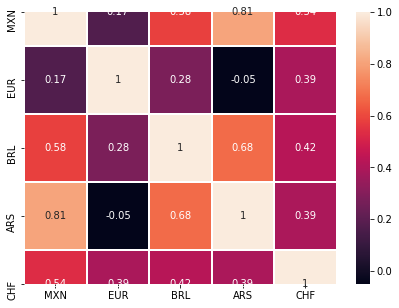

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True, linewidth=0.7)

# Ejericio 4

In [29]:
new = pd.DataFrame()
dias = 30
for a in df.columns:
    if a is not 'MXN':
        new[a] = df['MXN'].rolling(dias).corr(df[a])

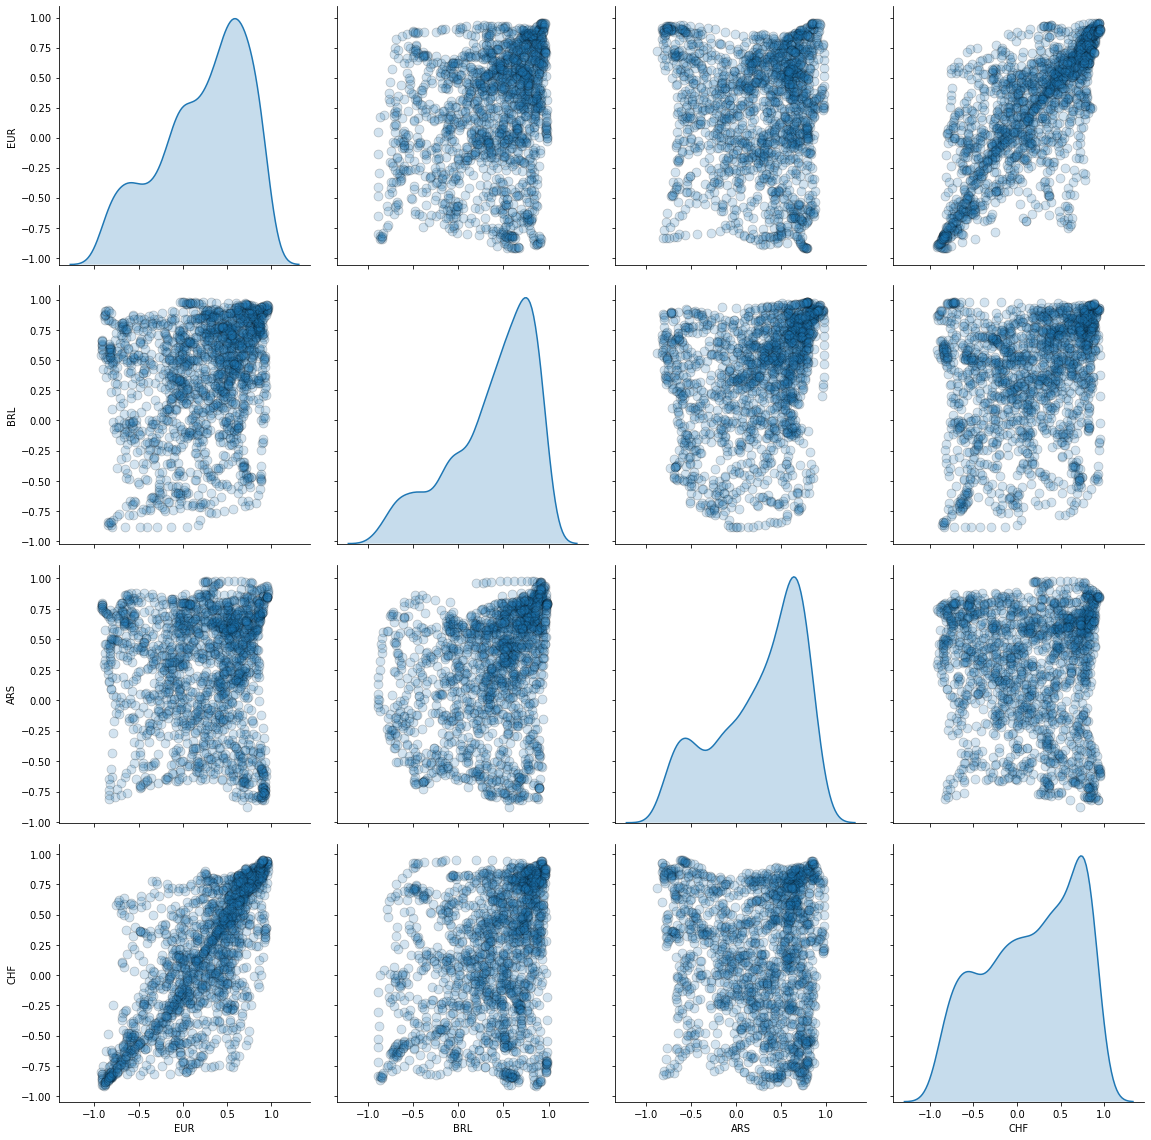

In [30]:
sns.pairplot(new, diag_kind = 'kde',
             plot_kws = {'alpha': 0.2, 's': 80, 'edgecolor': 'k'},
             size = 4)

El patrón más marcado se da entre Franco Suizo y el Euro como se puede observar el el gráfico superior. 

# EJERCICIO 5

In [25]:
new['mean'] = new.mean(axis=1)
new['max'] = new.max(axis=1)
new['min'] = new.min(axis=1)

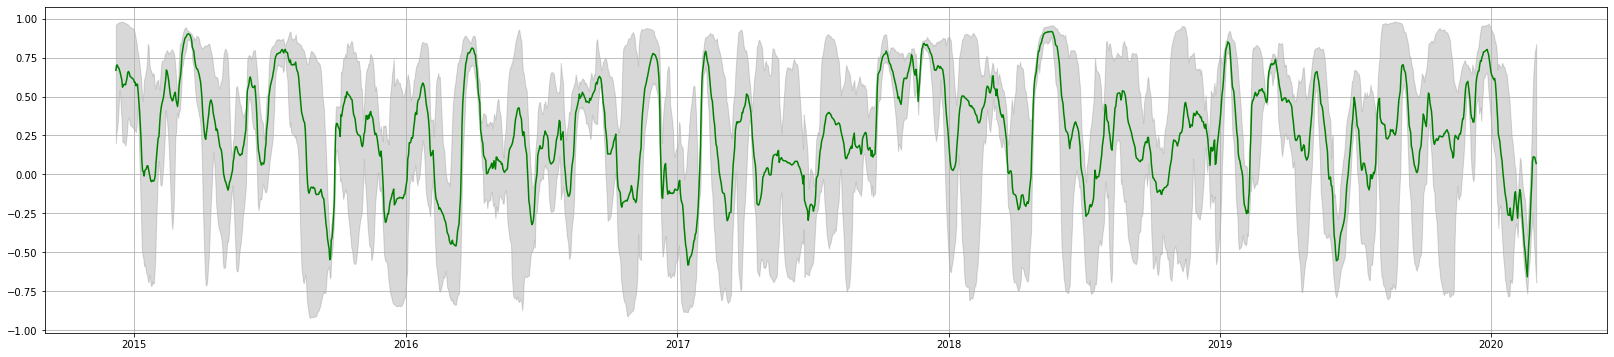

In [27]:
plt.figure(figsize=(28,6))
plt.grid()
plt.fill_between(new.index, new['max'], new['min'], color = 'gray',
                    alpha=0.3)
    # plot the mean on top
plt.plot(new['mean'], color='green')
plt.show()

# Anotaciones: Archivo .py BANXICO

In [ ]:
from requests_html import HTMLSession
import json
 
url = "https://www.banxico.org.mx/"
with HTMLSession() as sess:
    r = sess.get(url)
r.html.render()
 
indicadores = r.html.find("div[class='indicadores']", first=True)
indicadores
 
cards = indicadores.find("div[class='card a11ycard']")
 
indicadores = {}
for card in cards:
    titulo = card.find("a", first=True).text
    valor = card.find("span[class='valor']", first=True).text
    indicadores[titulo] = valor
 
with open("indicadores.json", "w") as f:
    json.dump(indicadores, f, indent=2, ensure_ascii=False)